In [5]:
#!pip install qutip

In [1]:
import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
#from scipy import constants as const

In [115]:

#Defining the shape of the output pulse as a function of time
def v(t,args):
    g = (root_gamma(t, args))**2
    return np.sqrt(g)*np.exp(-t*g*0.5)


#Defining |v(t)|^2 
def v_2(t, args):
    return np.conj(v(t, args))*v(t, args)

#Defining the time dependent coupling
def g_v(t, args):
    integral = quad(v_2, 0, t, args)[0]
    return -np.conj(v(t, args))/ ( integral**0.5 )
    #return (-1/( np.exp(t*gamma) - 1 )**0.5)
    #return 0

def root_gamma(t, args):
    beta = args['B']
    gamma_0 = args['G']                          #coupling constant
    return ( (1 - np.exp(-beta*t)) * gamma_0 )**0.5
    #return gamma_0**0.5

def root_g_gv(t, args):
    return root_gamma(t, args)*g_v(t, args)


<ipython-input-115-00a27b483a17>:14: RuntimeWarning: invalid value encountered in double_scalars
  return -np.conj(v(t, args))/ ( integral**0.5 )


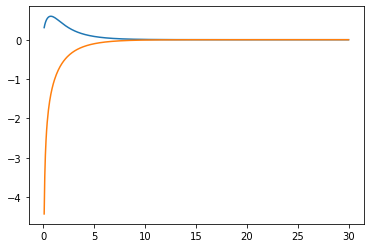

In [137]:
#Number of fock states in the output cavity
N = 2   
args={'B':1, 'G':1} 
t = 500

#Plotting out the output pulse and time dependent coupling
times = np.linspace(0.1, 30, t)
plt.plot(times, [v(t, args) for t in times]) 
plt.plot(times, [g_v(t, args) for t in times]) 

#Defining initial state of the system and cavity, with the system in excited state 
psi0 = qutip.tensor(qutip.fock(2,1), qutip.fock(N, 0))

#Anihilation operator of the cavity
a  = qutip.tensor(qutip.qeye(2), qutip.destroy(N))
n0 = qutip.tensor(qutip.qeye(2), qutip.fock(N, 0))
n1 = qutip.tensor(qutip.qeye(2), qutip.fock(N, 1))

#Lowering operator of the system
c = qutip.tensor(qutip.destroy(2), qutip.qeye(N))

Hs = a.dag()*a                                                                  #system hamiltonian
H = [ [ 0.5j*( (c.dag()*a)-(a.dag()*c) ) , root_g_gv]]                     #Net time dependent Hamiltonian (Eq 5 in the Quantum Pulses paper)

L_0 = [ [a, g_v], [c, root_gamma] ]                                                #Lindblad operator 0 (Eq 6)
#L_0 = [ (gamma**0.5)*c + (gamma)*a ]    
I = qutip.tensor(qutip.qeye(2), qutip.qeye(N))

result = qutip.mesolve(H, psi0, times, [L_0], [c.dag()*c, a.dag()*a], args=args )            #Evolving the system , with output c*c and a*a
#result_states = qutip.mesolve(H, psi0, times, [L_0,], [])            #Evolving the system , with output of rho's at various times


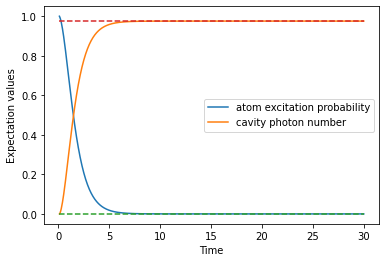

0.9754807512310368

In [138]:
plt.figure() 
plt.plot(times, result.expect[0]) 
plt.plot(times, result.expect[1]) 


#plt.plot(times, result.expect[0]+result.expect[1]) 

plt.plot([times[0], times[-1]], [result.expect[0][-1], result.expect[0][-1]],'--')
plt.plot([times[0], times[-1]], [result.expect[1][-1], result.expect[1][-1]],'--')

#plt.plot(times, (np.cumsum(I_0)-I_0[0])*(times[1]-times[0]) )
#plt.plot(times, (np.cumsum(I_0)-I_0[0])*(times[1]-times[0]) + result.expect[1] , 'b')


plt.xlabel('Time') 
plt.ylabel('Expectation values') 
plt.legend(("atom excitation probability", "cavity photon number")) 
plt.show() 
result.expect[1][-1]

In [140]:
final_exp = list()
b_list = list()

In [145]:
for b in np.linspace(2, 3, 10):
    result_loop = qutip.mesolve(H, psi0, times, [L_0], [a.dag()*a], args={'B':b, 'G':1} )
    final_exp.append(result_loop.expect[0][-1])
    b_list.append(b)
    print(b)

<ipython-input-115-00a27b483a17>:14: RuntimeWarning: invalid value encountered in double_scalars
  return -np.conj(v(t, args))/ ( integral**0.5 )


2.0
2.111111111111111
2.2222222222222223
2.3333333333333335
2.4444444444444446
2.5555555555555554
2.6666666666666665
2.7777777777777777
2.888888888888889
3.0


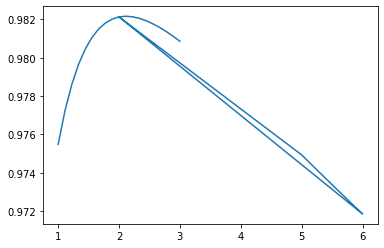

In [146]:
plt.plot(b_list, final_exp)

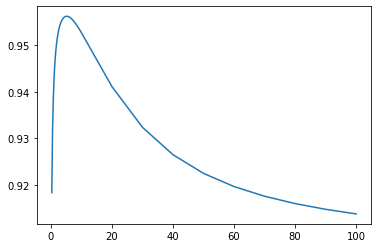

In [125]:
plt.plot(b_list[1:], final_exp[1:])

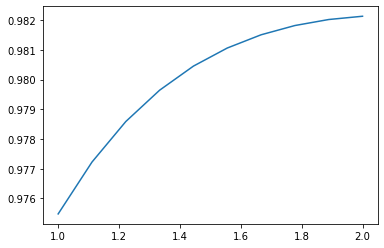

In [105]:
plt.plot(np.linspace(1, 2, 10), final_exp)

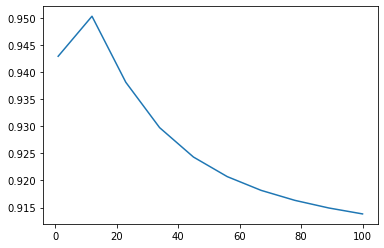

In [118]:
plt.plot(np.linspace(1, 100, 10), final_exp)

In [ ]:
np.linspace(1, 100, 10)